In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from peak_shave_sim import PeakShaveSim
from peak_shave_genopt import process_trafo_data

FILENAME = '../data/Sub71125.csv'
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 600

In [30]:
liion_cnt = 10
flywh_cnt = 10
sucap_cnt = 10
margin = .05

In [31]:
df = process_trafo_data(FILENAME)
mean_demand = df['net'].mean()
upperlim = mean_demand * (1 + margin)
lowerlim = mean_demand * (1 - margin)
config = {
    'delta_limit': 1,
    'LiIonBattery': liion_cnt,
    'Flywheel': flywh_cnt,
    'Supercapacitor': sucap_cnt
}
sim = PeakShaveSim(config, df)
total_costs, powers = sim.run_const_limits(lowerlim, upperlim, True)

batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 10, 'Flywheel': 10, 'Supercapacitor': 10}
Demand:     0.00 kW, Purchased:    59.08 kW, Charged:     59.08 kW, SelfD:   0.00 kW SOC:    54.36 kWh (  1.81%) Price:    0.00 Money spent:    0.00
Demand:    62.00 kW, Purchased:    62.00 kW, No charge/discharge,   SelfD:   2.17 kW SOC:    52.18 kWh (  1.74%) Price:   62.00 Money spent:   38.44
Demand:    53.40 kW, Purchased:    59.08 kW, Charged:      5.68 kW, SelfD:   2.09 kW SOC:    55.32 kWh (  1.84%) Price:   53.40 Money spent:   31.55
Demand:    49.80 kW, Purchased:    59.08 kW, Charged:      9.28 kW, SelfD:   2.21 kW SOC:    61.65 kWh (  2.06%) Price:   49.80 Money spent:   29.42
Demand:    53.20 kW, Purchased:    59.08 kW, Charged:      5.88 kW, SelfD:   2.47 kW SOC:    64.60 kWh (  2.15%) Price:   53.20 Money spent:   31.43
Demand:    51.40 kW, Purchased:    59.08 kW, Charged:      7.68 kW, SelfD:   2.58 kW SOC:    69.08 kWh (  2.30%) Price:   51.40 M

In [32]:
print(f'Total costs: {total_costs}')

Total costs: 217088.94707615048


In [33]:
powers = pd.DataFrame(powers, columns=['pnet', 'pbought', 'soc'])
print(powers)

      pnet    pbought         soc
0      0.0  59.083281   54.356618
1     62.0  62.000000   52.182353
2     53.4  59.083281   55.323677
3     49.8  59.083281   61.651348
4     53.2  59.083281   64.597913
...    ...        ...         ...
5113   0.0  59.083281  795.457893
5114   0.0  59.083281  817.996195
5115   0.0  59.083281  839.632966
5116   0.0  59.083281  860.404265
5117   0.0  59.083281  880.344713

[5118 rows x 3 columns]


(0.0, 400.0)

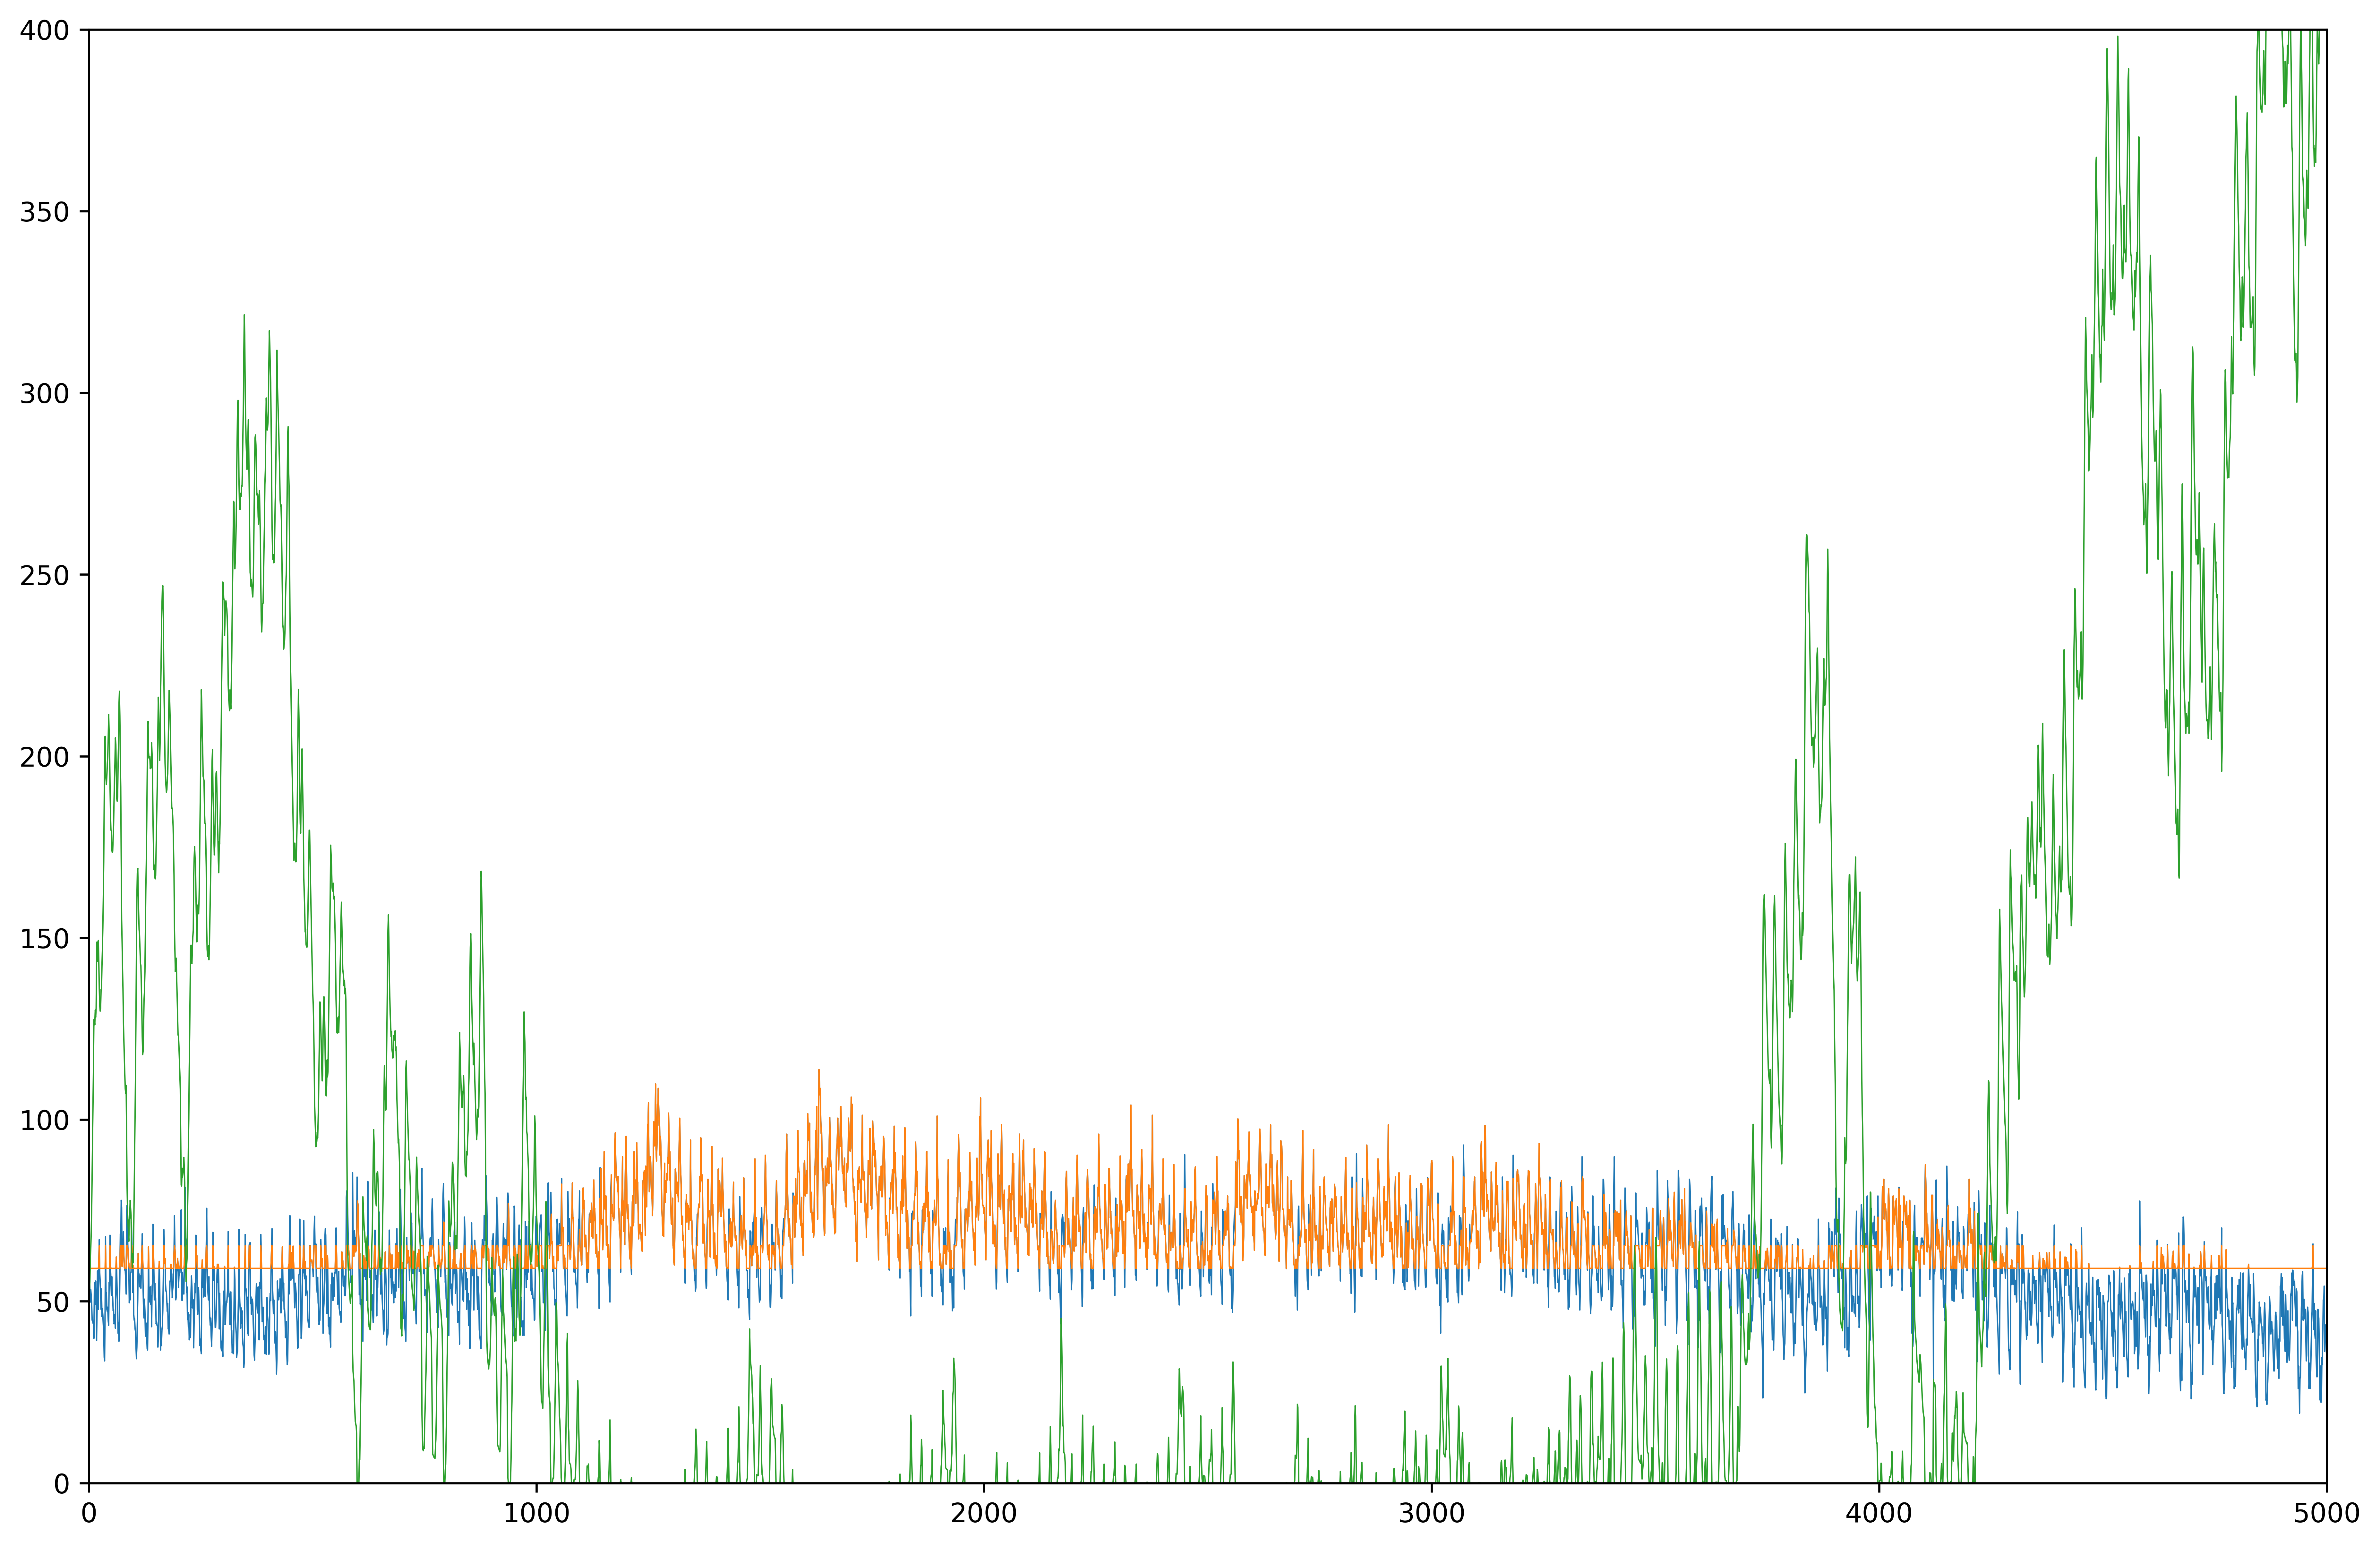

In [38]:
plt.plot(range(len(powers['pnet'])), powers['pnet'], linewidth=.5)
plt.plot(range(len(powers['pbought'])), powers['pbought'], linewidth=.5)
plt.plot(range(len(powers['soc'])), powers['soc'], linewidth=.5)
plt.xlim(0, 5000)
plt.ylim(0, 400)